In [14]:
import matplotlib.pyplot as plt
import json

In [15]:
with open("data/Toy_SGD_lr=1_FakeManila.json", "r") as f:
    data = json.load(f)

In [16]:
data[-1]

{'problem': '<problems.toy_benchmark_problem.ToyProblem object at 0x10ac74710>',
 'n_qubits': 2,
 'ansatz': '2-layer HEA',
 'cost': 'local',
 'optimizer': 'SGD_lr=1',
 'cond_num': 2,
 'error_threshold': 0.0016,
 'noise_model': 'FakeManila',
 'TTS': 20000.510003089905,
 'STS': 1533,
 'final_EAD': 0.004674389662140989,
 'EAD_history': [0.25743095988519477,
  0.0203591400706857,
  0.020183106448320515,
  0.023139861620949324,
  0.013871887424148462,
  0.010486310025220593,
  0.006616547507269493,
  0.0077836068661874865,
  0.004970746239233293,
  0.01107319991225854,
  0.006695340612352826,
  0.007347775591691924,
  0.005155857813693827,
  0.005414367914861811,
  0.008315509712812811,
  0.005086727941593474,
  0.007395731867948452,
  0.007915199916527095,
  0.009423267940385262,
  0.013556001346308142,
  0.010474777363288699,
  0.010060675974265023,
  0.008432466407724834,
  0.01087527469019305,
  0.004994849574223801,
  0.009229651333021569,
  0.005797157463250129,
  0.006184848537785253

In [17]:
# fig, (ax1) = plt.subplots(1)

# x_labels = ["Noiseless", "5% Bitflip error", "FakeManila"]
# y_vals = [5,5,0]

# ax1.bar(x_labels, y_vals, color='skyblue')

# # Adding title and labels
# plt.title('Max implementation on different backends')
# plt.xlabel('Type of backend')
# plt.ylabel('Max qubits ran')

# plt.savefig("images/max_imp.png")

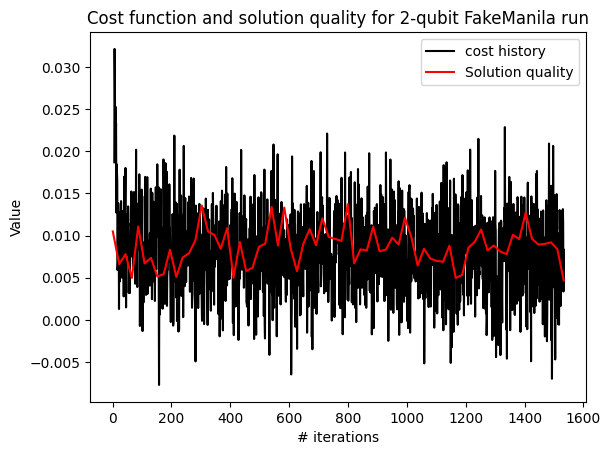

In [18]:
import numpy as np

noiseless_data = data[-1]
x1 = range(6, noiseless_data["STS"]+1)
y1 = noiseless_data["cost_history"][5:]


x2 = np.linspace(1, noiseless_data["STS"], len(noiseless_data["EAD_history"]) - 5)
y2 = noiseless_data["EAD_history"][5:]

fig, (ax1) = plt.subplots(1)

ax1.plot(x1, y1, label="cost history", color="black")
# ax1.scatter(x2, y2, label="Solution quality", color="red")
ax1.plot(x2, y2, label="Solution quality", color="red")

# Adding title and labels
plt.title('Cost function and solution quality for 2-qubit FakeManila run')
plt.xlabel('# iterations')
plt.ylabel('Value')
plt.legend()

plt.savefig("fakemanila_cost+sol.png")

In [19]:
with open("data/Toy_SGD_lr=1_Bitflip=0.05_v2.json", "r") as f:
    data = json.load(f)

In [20]:
from collections import defaultdict
import numpy as np
d = defaultdict(lambda: defaultdict(list))

for trial in data:
    d[trial["n_qubits"]]["STS"].append(trial["STS"])

In [21]:
means = []
stds = []
for n_qubits in d.keys():
    means.append(np.mean(d[n_qubits]["STS"]))
    stds.append(np.std(d[n_qubits]["STS"]))

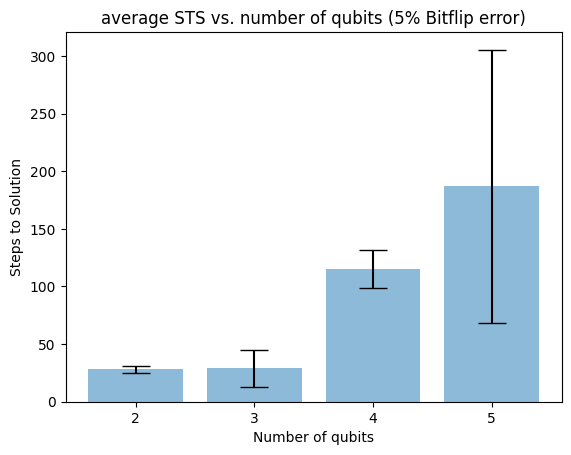

In [22]:
# Plotting
fig, ax = plt.subplots()

# Bar for mean
ax.bar([2,3,4,5], means[:-1], yerr=stds[:-1], align='center', alpha=0.5, ecolor='black', capsize=10, label='Mean ± SEM')

ax.set_xticks([2,3,4,5])
# Adding labels and title
ax.set_xlabel('Number of qubits')
ax.set_ylabel('Steps to Solution')
# ax.set_title('average STS vs. number of qubits (Noiseless)')
ax.set_title('average STS vs. number of qubits (5% Bitflip error)')

# plt.savefig('images/noiseless_STS.png')
plt.savefig('images/Bitflip_STS.png')

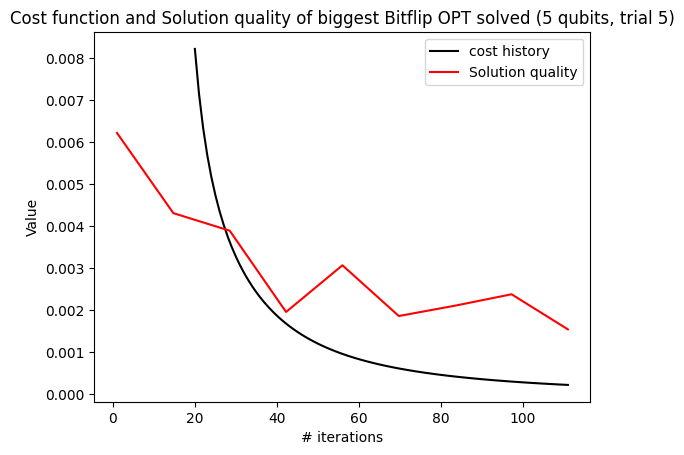

In [23]:
import numpy as np

noiseless_data = data[-6]
x1 = range(20, noiseless_data["STS"]+1)
y1 = noiseless_data["cost_history"][19:]


x2 = np.linspace(1, noiseless_data["STS"], len(noiseless_data["EAD_history"]) - 3)
y2 = noiseless_data["EAD_history"][3:]

fig, (ax1) = plt.subplots(1)

ax1.plot(x1, y1, label="cost history", color="black")
# ax1.scatter(x2, y2, label="Solution quality", color="red")
ax1.plot(x2, y2, label="Solution quality", color="red")

# Adding title and labels
plt.title('Cost function and Solution quality of biggest Bitflip OPT solved (5 qubits, trial 5)')
plt.xlabel('# iterations')
plt.ylabel('Value')
plt.legend()

plt.savefig("bitflip=0.05_cost+sol.png")

In [24]:
with open("data/Toy_SGD_lr=1_None_v2.json", "r") as f:
    data = json.load(f)

In [25]:
data[-12]

{'problem': 'ToyProblem',
 'trial': 4,
 'n_qubits': 5,
 'ansatz': '2-layer HEA',
 'cost': 'local',
 'optimizer': 'SGD_lr=1',
 'error_threshold': 0.0016,
 'noise_model': None,
 'TTS': 1856.9859759807587,
 'STS': 306,
 'final_EAD': 0.0013479701842330882,
 'EAD_history': [2.4742353490195805,
  0.7144336735561709,
  0.41470835510458454,
  0.2756511282672339,
  0.18738228368634838,
  0.1274645504339598,
  0.09580898055823132,
  0.06619703509950316,
  0.04400359661962336,
  0.03113469714095298,
  0.023186397065027804,
  0.018713205342990737,
  0.01339420528648055,
  0.012562125428377596,
  0.012650542355966587,
  0.008665110640266092,
  0.010477511585209955,
  0.00628281526951783,
  0.008553082170579698,
  0.006721513181218231,
  0.008406912082036292,
  0.007099649492910774,
  0.005342756742680682,
  0.004188855820032176,
  0.006537433056297383,
  0.004546924728753339,
  0.004193768199489068,
  0.0042737257872381635,
  0.003480784517458402,
  0.004849301443231719,
  0.003638097139368296,
  0

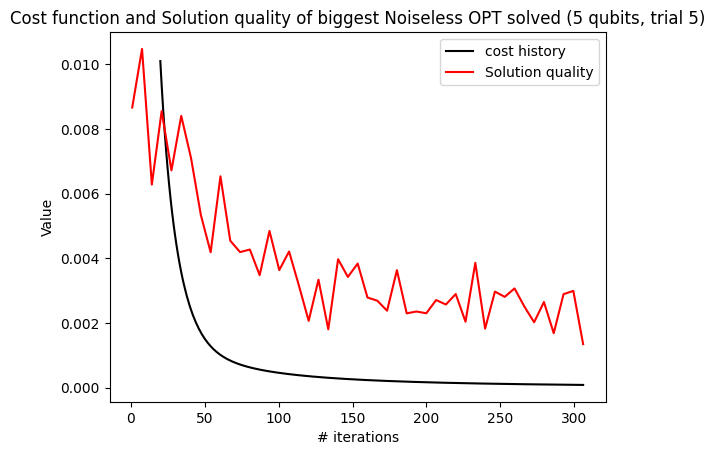

In [26]:
import numpy as np

noiseless_data = data[-12]
x1 = range(20, noiseless_data["STS"]+1)
y1 = noiseless_data["cost_history"][19:]


x2 = np.linspace(1, noiseless_data["STS"], len(noiseless_data["EAD_history"]) - 15)
y2 = noiseless_data["EAD_history"][15:]

fig, (ax1) = plt.subplots(1)

ax1.plot(x1, y1, label="cost history", color="black")
# ax1.scatter(x2, y2, label="Solution quality", color="red")
ax1.plot(x2, y2, label="Solution quality", color="red")

# Adding title and labels
plt.title('Cost function and Solution quality of biggest Noiseless OPT solved (5 qubits, trial 5)')
plt.xlabel('# iterations')
plt.ylabel('Value')
plt.legend()

plt.savefig("noiseless_cost+sol.png")